In [1]:
# import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [9]:
# variables and spesific parameters and constants
basic_breathing_factor_dict = [
    {"mean": {"16-31": 1.2e-02}},
    {"percentile":{"16-31": 1.6e-02}}
]
relative_breathing_factor_16_31 = (basic_breathing_factor_dict[1]["percentile"]["16-31"]* 60) / (basic_breathing_factor_dict[0]["mean"]["16-31"]* 60)
basic_quanta_exhalation_rate_listening = 1.0
quanta_exhalation_rate_speaking = 5.7
total_number_of_people = [11, 21, 31]
# relative_quanta_exhalation_rate = basic_quanta_exhalation_rate_listening / ((basic_quanta_exhalation_rate_listening * (total_number_of_people - 1) + quanta_exhalation_rate_speaking) / total_number_of_people)
mask_efficiency = 1 - 0.532 # best case scenario
fraction_of_people_with_mask = 1
infected_people = [1, 2]
fraction_of_immune_people = 0.462
# susceptible_people = (total_number_of_people - infected_people) * (1 - fraction_of_immune_people)
duration_of_event_minute = 45
duration_of_event_hour = duration_of_event_minute / 60
ventilation_with_outside_air = 3.8
virus_decay_rate = 0.63
deposition_of_the_surface = 0.9
additional_control_measures = 0
loss_rate = ventilation_with_outside_air + virus_decay_rate + deposition_of_the_surface + additional_control_measures
width_of_room = 5
length_of_room = 5
height_of_room = 3
volume_of_room = width_of_room * length_of_room * height_of_room

def infection_risk_parameter(relative_breathing_factor, relative_quanta_exhalation_rate, mask_efficiency, fraction_of_people_with_mask, duration_of_event_minute, duration_of_event_hour, susceptible_people, loss_rate, volume_of_room):
    return relative_breathing_factor * relative_quanta_exhalation_rate * ( 1 - mask_efficiency * fraction_of_people_with_mask ) - ( 1 - mask_efficiency * fraction_of_people_with_mask ) * duration_of_event_hour *  ((susceptible_people)/(loss_rate * volume_of_room)) * (1 - (1 - math.exp(-loss_rate * duration_of_event_minute))/(loss_rate * duration_of_event_minute))


In [6]:
df_dict = {}

for number_of_people in total_number_of_people:
    out_b_array = []
    out_qe_array = []
    out_me_array = []
    out_mp_array = []
    out_th_array = []
    out_tm_array = []
    out_np_array = []
    out_lr_array = []
    out_v_array = []
    out_risk_param_array = []
    out_risk_state_array = []
    out_infected_people_array = []
    for infected in infected_people:
        relative_quanta_exhalation_rate = basic_quanta_exhalation_rate_listening / ((basic_quanta_exhalation_rate_listening * (number_of_people - 1) + quanta_exhalation_rate_speaking) / number_of_people)
        susceptible_people = (number_of_people - infected) * (1 - fraction_of_immune_people)
        out_b_array.append(relative_breathing_factor_16_31)
        out_qe_array.append(relative_quanta_exhalation_rate)
        out_me_array.append(mask_efficiency)
        out_mp_array.append(fraction_of_people_with_mask)
        out_tm_array.append(duration_of_event_minute)
        out_th_array.append(duration_of_event_hour)
        out_np_array.append(susceptible_people)
        out_lr_array.append(loss_rate)
        out_v_array.append(volume_of_room)
        out_infected_people_array.append(infected)
        output = infection_risk_parameter(relative_breathing_factor_16_31, relative_quanta_exhalation_rate, mask_efficiency, fraction_of_people_with_mask, duration_of_event_minute, duration_of_event_hour, susceptible_people, loss_rate,volume_of_room)
        out_risk_param_array.append(output)
        if output < 0.05:
            out_risk_state_array.append("Low")
        elif output <= 0.5:
            out_risk_state_array.append("Medium")
        elif output > 0.5:
            out_risk_state_array.append("High")
    data = {"Relative Breathing Factor": out_b_array, "Relative quanta exhalation": out_qe_array,
    "Exhalation mask efficiency": out_me_array, "Inhalation mask efficiency": out_me_array, "Fraction of people with mask" : out_mp_array, "Number of infected people": out_infected_people_array,
    "Time in Hour": out_th_array, "Time in Min": out_tm_array, "Number of susceptible people": out_np_array,
    "Total first order loss": out_lr_array, "Volume": out_v_array, "Infection risk parameter": out_risk_param_array,
    "Risk importance": out_risk_state_array}
    df = pd.DataFrame(data)
    df.to_excel(r"/home/theoguzhan/projects/JF Covid/Number of people {}.xlsx".format(str(number_of_people).replace(".", ",")))
    df_dict[str(number_of_people)] = df
print(df_dict)

{'11':    Relative Breathing Factor  Relative quanta exhalation  \
0                   1.333333                    0.700637   
1                   1.333333                    0.700637   

   Exhalation mask efficiency  Inhalation mask efficiency  \
0                       0.468                       0.468   
1                       0.468                       0.468   

   Fraction of people with mask  Number of infected people  Time in Hour  \
0                             1                          1          0.75   
1                             1                          5          0.75   

   Time in Min  Number of susceptible people  Total first order loss  Volume  \
0           45                         5.380                    5.33      75   
1           45                         3.228                    5.33      75   

   Infection risk parameter Risk importance  
0                  0.491638          Medium  
1                  0.493777          Medium  , '21':    Relative B

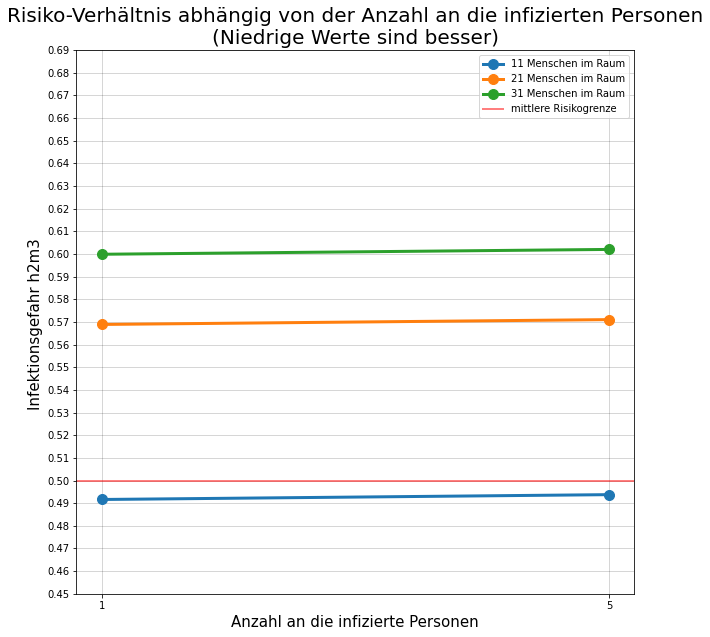

In [8]:
plt.figure(figsize=(10, 10))
for people_number in df_dict.keys():
    plot_df = df_dict[people_number].sort_values(by=["Infection risk parameter", "Number of infected people"])[["Infection risk parameter", "Number of infected people"]]
    plt.plot(plot_df["Number of infected people"], plot_df["Infection risk parameter"], 'o-', linewidth='3', ms='10', label=f"{people_number} Menschen im Raum")
    plt.title("Risiko-Verhältnis abhängig von der Anzahl an die infizierten Personen\n(Niedrige Werte sind besser)", fontdict={'size': 20})
plt.xticks(infected_people)
plt.yticks(np.arange(0.45, 0.7, 0.01))
plt.axhline(y=0.5, color="r", lw=2, alpha=0.5, label="mittlere Risikogrenze")
plt.grid(color='k', alpha=0.2)
plt.ylabel("Infektionsgefahr h2m3 ", fontdict={'size': 15})
plt.xlabel("Anzahl an die infizierte Personen", fontdict={'size': 15})
plt.legend()
plt.savefig("Infected people and people number")
plt.show()